---
### **Temperature Forecasting using IoT Data**
---
#### **Brief Description**

This dataset contains the temperature readings from IOT devices installed outside and inside of an anonymous Room (say - admin room). The device was in the alpha testing phase. So, It was uninstalled or shut off several times during the entire reading period ( 28-07-2018 to 08-12-2018) which resulted in random interval recordings and few mis-readings (outliers)

Dataset Link:
https://www.kaggle.com/datasets/atulanandjha/temperature-readings-iot-devices?resource=download

---

#### **Variable Information**

**id** : unique IDs for each reading

**room_id/id** : room id in which device was installed (inside and/or outside) -> currently 'admin room' only for example purpose.

**noted_date** : date and time of reading

**temp** : temperature readings

**out/in** : whether reading was taken from device installed inside or outside of room?

---

#### **Some interesting questions to answer**

1. What was the max and min temperature?

2. How outside temperature was related to inside temperature?

3. What was the variance of temperature for inside and outside room temperature?

4. Which was the hottest/coolest month?

5. Can we use Time Series Forecast algo to predict the next scenario?

---

#### **Importing Libraries**

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

---

#### **Loading Dataset**

---

In [2]:
# df = pd.read_csv("/content/drive/MyDrive/IOT-temp.csv")
df = pd.read_csv("IOT-temp.csv")
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


---

#### **Exploratory Data Analysis**

---

In [3]:
# What is the shape of the data? i.e. Number of Rows and Columns

df.shape

(97606, 5)

In [4]:
# How many total values in each columns?
# How many null values?
# What is the data types of each column?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [5]:
# How many unique values are available in each column?

df.apply(lambda x: x.nunique())

id            97605
room_id/id        1
noted_date    27920
temp             31
out/in            2
dtype: int64

**Data Pre-processing**

In [6]:
# Do we need 'id' and 'room_id/id' columns? No. Both columns are not helpful in terms of any analysis or prediction
# 'id' is just a identifier for each observation and
# 'room_id/id' has only one value over all rows of the dataset

df.drop(['id', 'room_id/id'], axis=1, inplace=True)
df

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


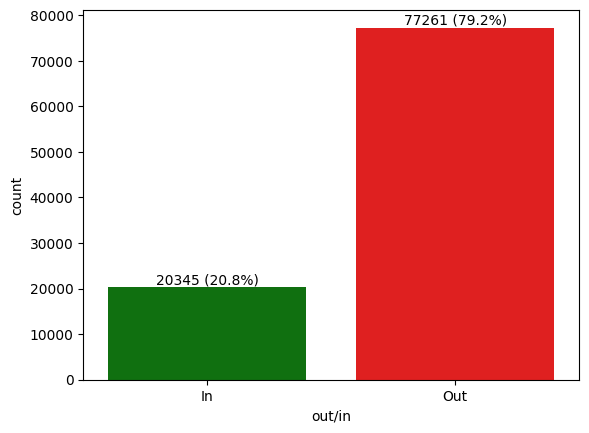

In [7]:
# How many observations do we have from IoT Sensors installed Outside
# and Inside of the room?

sns.countplot(x='out/in', data=df, palette=['green', 'red'])
total_count = len(df)

for bar in plt.gca().patches:
    bar_height = bar.get_height()
    percentage = (bar_height / total_count) * 100
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.5,
        f'{int(bar_height)} ({percentage:.1f}%)',
        ha='center',
        va='bottom'
    )

plt.show()

In [8]:
# Give me a statistical summary of temperature column

df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [9]:
# Do we need both date and time? Is it going to add any value?
# What about keeping it separate?
# Yes. It will help us to find the temperature variation due to season (by date) and time of the day

df['datetime'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# df.set_index('datetime', inplace=True)
df.drop('noted_date', axis=1, inplace=True)

columns_order = ['date', 'time'] + [col for col in df.columns if col not in ['date', 'time']]
df = df[columns_order]

df

,date,time,temp,out/in,datetime
0,2018-12-08,09:30:00,29,In,2018-12-08 09:30:00
1,2018-12-08,09:30:00,29,In,2018-12-08 09:30:00
2,2018-12-08,09:29:00,41,Out,2018-12-08 09:29:00
3,2018-12-08,09:29:00,41,Out,2018-12-08 09:29:00
4,2018-12-08,09:29:00,31,In,2018-12-08 09:29:00
...,...,...,...,...,...
97601,2018-07-28,07:07:00,31,In,2018-07-28 07:07:00
97602,2018-07-28,07:07:00,31,In,2018-07-28 07:07:00
97603,2018-07-28,07:06:00,31,In,2018-07-28 07:06:00
97604,2018-07-28,07:06:00,31,In,2018-07-28 07:06:00


In [10]:
# Filter data for inside and outside

inside_df = df[df['out/in'] == 'In']
outside_df = df[df['out/in'] == 'Out']

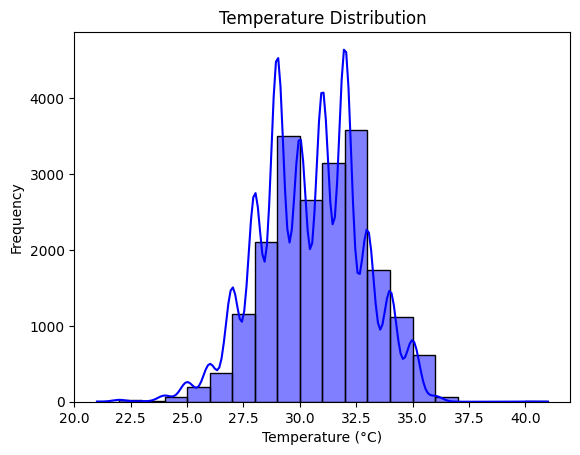

In [11]:
# How the inside temperature values are statistically distributed?

sns.histplot(data=inside_df['temp'], bins=20, kde=True, color='blue')

plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

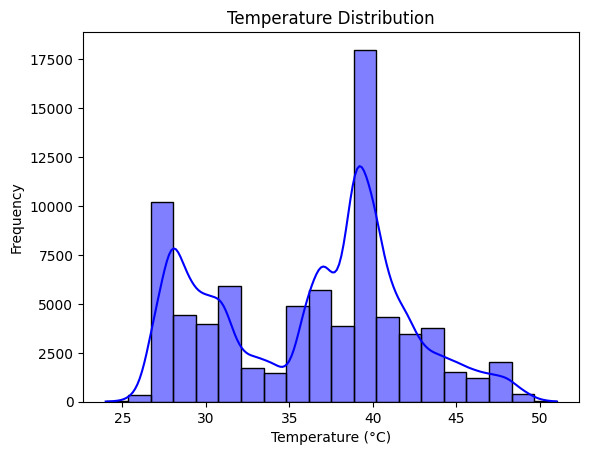

In [12]:
# How the outside temperature values are statistically distributed?

sns.histplot(data=outside_df['temp'], bins=20, kde=True, color='blue')

plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

In [13]:
# # Do we need both date and time? Is it going to add any value?
# # What about keeping it separate?
# # Yes. It will help us to find the temperature variation due to season (by date) and time of the day

# df['datetime'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')
# df['date'] = df['datetime'].dt.date
# df['time'] = df['datetime'].dt.time

# # df.set_index('datetime', inplace=True)
# df.drop('noted_date', axis=1, inplace=True)

# columns_order = ['date', 'time'] + [col for col in df.columns if col not in ['date', 'time']]
# df = df[columns_order]

# df

**Answers to the interesting questions**

In [14]:
# What is the max and min temperature collected by each inside and outside sensor?
# What was the date and time when the temperature was minimum and maximum?

def get_temp_info(df, temp_col, date_col, time_col, mode='max'):

    row = df.loc[df[temp_col].idxmax()] if mode == 'max' else df.loc[df[temp_col].idxmin()]
    return {
        'temperature': row[temp_col],
        'date': row[date_col],
        'time': row[time_col]
    }

# Get max and min temperature information for Inside
max_temp_inside = get_temp_info(inside_df, 'temp', 'date', 'time', mode='max')
min_temp_inside = get_temp_info(inside_df, 'temp', 'date', 'time', mode='min')

# Get max and min temperature information for Outside
max_temp_outside = get_temp_info(outside_df, 'temp', 'date', 'time', mode='max')
min_temp_outside = get_temp_info(outside_df, 'temp', 'date', 'time', mode='min')

print(f"Max Inside Temperature: {max_temp_inside['temperature']}°C on {max_temp_inside['date']} at {max_temp_inside['time']}")
print(f"Min Inside Temperature: {min_temp_inside['temperature']}°C on {min_temp_inside['date']} at {min_temp_inside['time']}")
print("--------------------------------------------------------")
print(f"Max Outside Temperature: {max_temp_outside['temperature']}°C on {max_temp_outside['date']} at {max_temp_outside['time']}")
print(f"Min Outside Temperature: {min_temp_outside['temperature']}°C on {min_temp_outside['date']} at {min_temp_outside['time']}")

Max Inside Temperature: 41°C on 2018-09-16 at 14:15:00
Min Inside Temperature: 21°C on 2018-12-03 at 11:02:00
--------------------------------------------------------
Max Outside Temperature: 51°C on 2018-09-30 at 17:29:00
Min Outside Temperature: 24°C on 2018-09-06 at 15:34:00


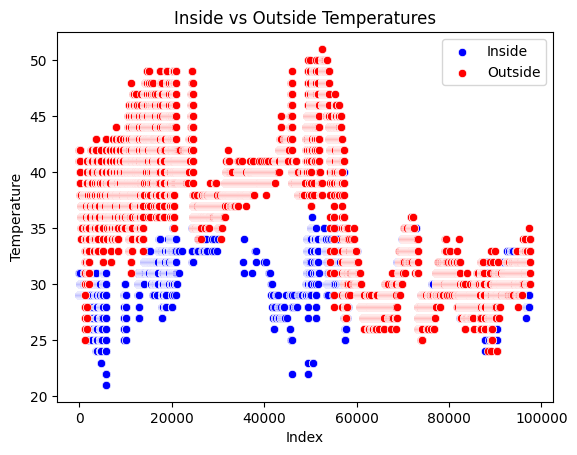


No correlation between inside and outside temperatures.


In [15]:
# How outside temperature was related to inside temperature?

# inside_temp = df[df['out/in'] == 'In']['temp']
# outside_temp = df[df['out/in'] == 'Out']['temp']

inside_temp = inside_df['temp']
outside_temp = outside_df['temp']

# Plot scatter plot
sns.scatterplot(x=inside_temp.index, y=inside_temp, label='Inside', color='blue')
sns.scatterplot(x=outside_temp.index, y=outside_temp, label='Outside', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.title('Inside vs Outside Temperatures')
plt.show()

correlation = inside_temp.corr(outside_temp)

if not np.isnan(correlation):
  print(f"Correlation between inside and outside temperatures: {correlation}")
else:
  print("\nNo correlation between inside and outside temperatures.")

In [16]:
# What was the variance of temperature for inside and outside room temperature?
# Note - Variance values give an idea of how much the temperature fluctuates within each environment.

inside_variance = inside_temp.var()
outside_variance = outside_temp.var()

print(f"Variance of inside temperature: {round(inside_variance, 2)}")
print(f"Variance of outside temperature: {round(outside_variance, 2)}")

Variance of inside temperature: 5.01
Variance of outside temperature: 32.68


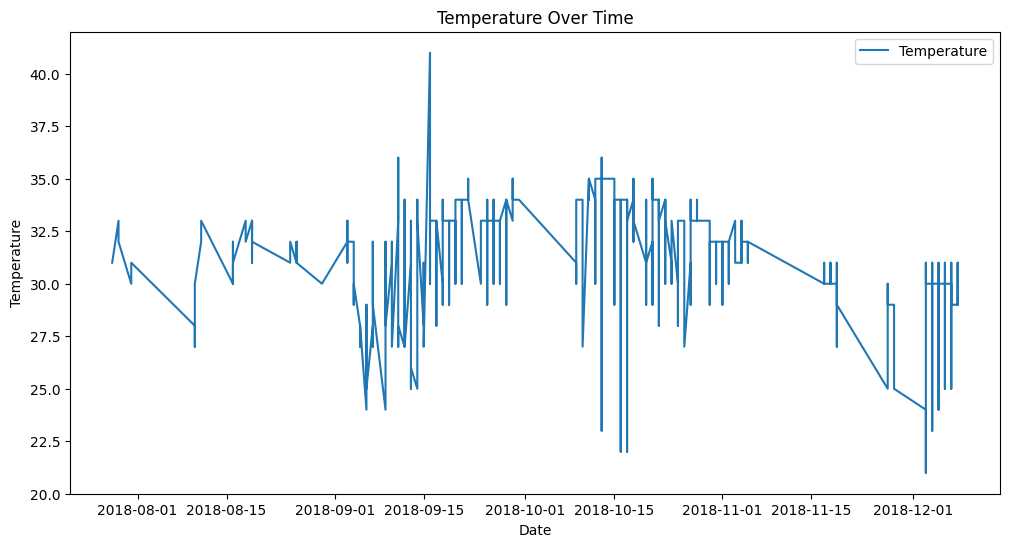

In [17]:
# Is there any trends, seasonal variations, and anomalies over time for inside temperature?

plt.figure(figsize=(12, 6))
plt.plot(inside_df['date'], inside_df['temp'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

**Observation** : 

The above plot indicates that the inside temperature remains relatively steady, ranging between 25°C and 35°C.

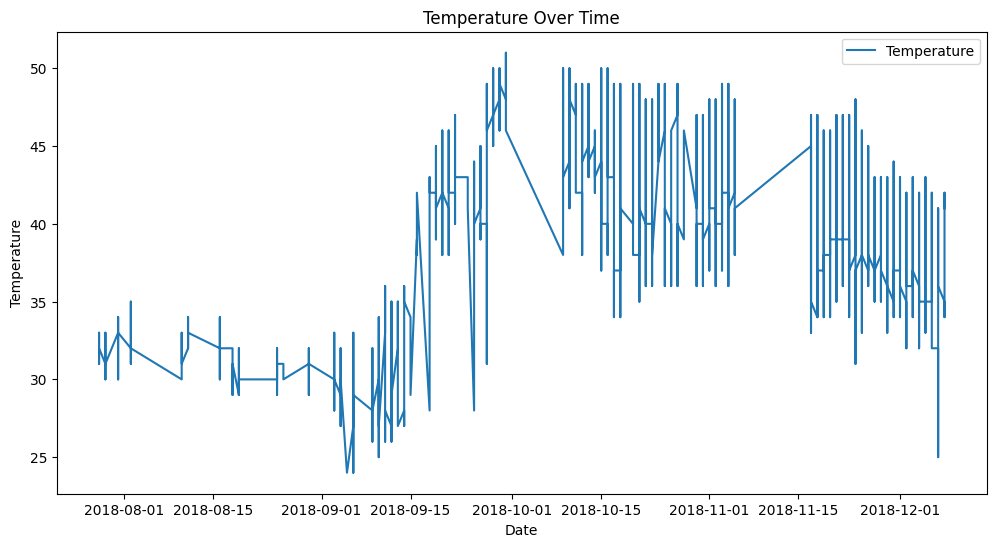

In [18]:
# Is there any trends, seasonal variations, and anomalies over time for outside temperature?

plt.figure(figsize=(12, 6))
plt.plot(outside_df['date'], outside_df['temp'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

**Observation** : 

The above plot indicates that the outside temperature remains relatively steady, ranging between 25°C and 35°C, during August and September. However, from October onwards, the range shifts to higher values, fluctuating between 35°C and 50°C.

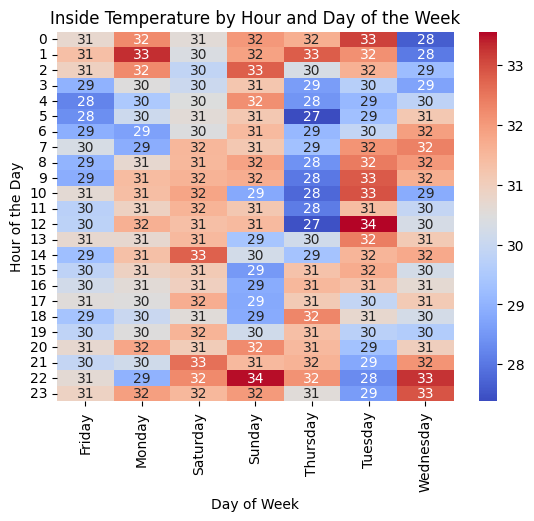

In [19]:
# Is there any patterns, such as warmer or cooler hours on specific days for inside temperature?

import calendar

inside_df['hour'] = inside_df['datetime'].dt.hour

inside_df['dayOfWeek'] = inside_df['datetime'].dt.weekday
inside_df['dayName'] = inside_df['dayOfWeek'].apply(lambda x: calendar.day_name[x])

pivot = inside_df.pivot_table(index='hour', columns='dayName', values='temp', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title('Inside Temperature by Hour and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of the Day')
plt.show()

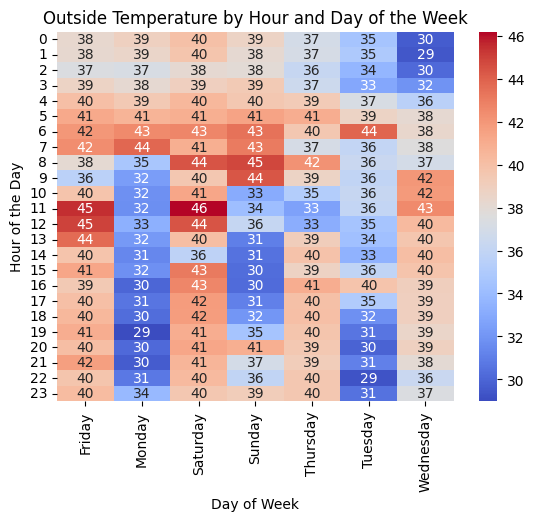

In [20]:
# Is there any patterns, such as warmer or cooler hours on specific days for outside temperature?

import calendar

outside_df['hour'] = outside_df['datetime'].dt.hour

outside_df['dayOfWeek'] = outside_df['datetime'].dt.weekday
outside_df['dayName'] = outside_df['dayOfWeek'].apply(lambda x: calendar.day_name[x])

pivot = outside_df.pivot_table(index='hour', columns='dayName', values='temp', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title('Outside Temperature by Hour and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of the Day')
plt.show()

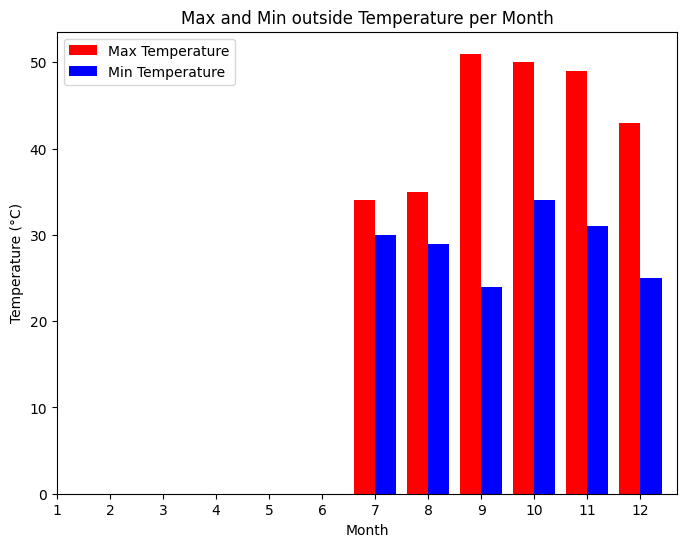

Hottest Month: September (9) with a temperature of 51°C
Coolest Month: September (9) with a temperature of 24°C


In [21]:
# Which was the hottest/coolest month for outside temperature?

outside_df['month'] = outside_df['datetime'].dt.month

# Calculate max and min temperature per month
monthly_max_temp = outside_df.groupby('month')['temp'].max()
monthly_min_temp = outside_df.groupby('month')['temp'].min()

# Identify the hottest and coolest months based on max and min temperatures
hottest_month = monthly_max_temp.idxmax()
coolest_month = monthly_min_temp.idxmin()

# Get the corresponding temperatures
hottest_temp = monthly_max_temp.max()
coolest_temp = monthly_min_temp.min()

# Get the month name from the number
hottest_month_name = calendar.month_name[hottest_month]
coolest_month_name = calendar.month_name[coolest_month]

plt.figure(figsize=(8, 6))
plt.bar(monthly_max_temp.index - 0.2, monthly_max_temp, width=0.4, label='Max Temperature', color='red')
plt.bar(monthly_min_temp.index + 0.2, monthly_min_temp, width=0.4, label='Min Temperature', color='blue')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Max and Min outside Temperature per Month')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

print(f"Hottest Month: {hottest_month_name} ({hottest_month}) with a temperature of {hottest_temp}°C")
print(f"Coolest Month: {coolest_month_name} ({coolest_month}) with a temperature of {coolest_temp}°C")

In [22]:
# What is the highest temperature difference for Inside or Outside temperature?

def find_and_plot_max_temp_diff(df, group_label):
    group_df = df[df['out/in'] == group_label].reset_index(drop=True)

    # Calculate temperature differences between consecutive days
    group_df['temp_diff'] = group_df['temp'].diff()

    # Find the maximum temperature difference and the corresponding consecutive dates
    max_temp_diff_idx = group_df['temp_diff'].abs().idxmax()
    max_temp_diff_val = group_df.loc[max_temp_diff_idx, 'temp_diff']

    # Get the dates for the highest temperature difference
    max_temp_diff_dates = group_df.loc[[max_temp_diff_idx, max_temp_diff_idx - 1], 'datetime']
    max_temp_diff_dates = max_temp_diff_dates.dt.date  # Convert to date only (remove time)

    max_temp_values = group_df.loc[[max_temp_diff_idx, max_temp_diff_idx - 1], 'temp'].values

    plt.figure(figsize=(10, 6))

    plt.plot(group_df['date'], group_df['temp'], label=f'{group_label} Temperature', color='blue' if group_label == 'In' else 'red', marker='o')
    plt.plot(group_df['date'], group_df['temp_diff'], label=f'{group_label} Temp Difference', color='blue' if group_label == 'In' else 'red', linestyle='dashed')

    # Highlight the highest temperature difference on the plot
    plt.scatter(max_temp_diff_dates, [max_temp_diff_val] * 2, color='green', zorder=5, label=f'Max Temp Diff: {max_temp_diff_val}°C')

    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=90)
    plt.title(f'{group_label} Temperature Trend with Max Temp Difference ({max_temp_diff_val}°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Highest temperature difference for {group_label} was {max_temp_diff_val}°C between {max_temp_diff_dates.iloc[0]} ({max_temp_values[1]}°C) and {max_temp_diff_dates.iloc[1]} ({max_temp_values[0]}°C)")


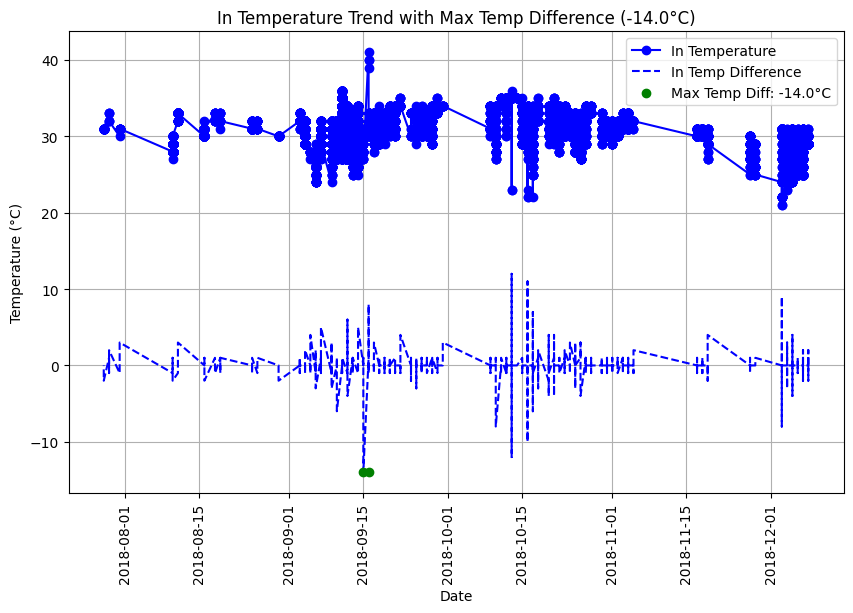

Highest temperature difference for In was -14.0°C between 2018-09-15 (41°C) and 2018-09-16 (27°C)


In [23]:
# Highest temperature difference for Inside readings

find_and_plot_max_temp_diff(df, 'In')

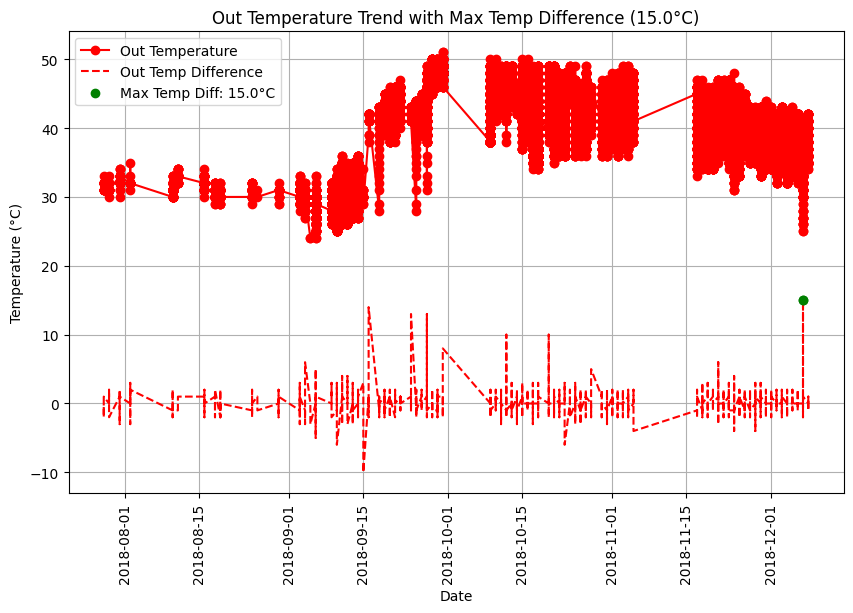

Highest temperature difference for Out was 15.0°C between 2018-12-07 (26°C) and 2018-12-07 (41°C)


In [24]:
# Highest temperature difference for Outside readings

find_and_plot_max_temp_diff(df, 'Out')

---

**Observations:**

1. Maximum Inside temperature was 41°C on 2018-09-16 at 14:15:00 and minimum Temperature was 21°C on 2018-12-03 at 11:02:00

2. Maximum Outside temperature was 51°C on 2018-09-30 at 17:29:00 and minimum Temperature was 24°C on 2018-09-06 at 15:34:00

3. There is no correlation between inside and outside temperatures.

4. Variance of inside temperature is 5.01 and outside temperature is 32.68

5. Hottest Month: September (9) with a temperature of 51°C

6. Coolest Month: December (12) with a temperature of 21°C

7. Highest temperature difference for Inside temperature readings was -14.0°C between 2018-09-15 (41°C) and 2018-09-16 (27°C)

8. Highest temperature difference for Outside temperature readings was 15.0°C between 2018-12-07 (26°C) and 2018-12-07 (41°C)


**Note:**

1. Outside: High temperature variation may be caused by extreme weather events such as storms or climate disruptions. It could also result from faulty sensor readings.

2. Inside: High temperature variation may be caused by HVAC system malfunctions, building insulation issues, or ongoing construction activities. Faulty sensor readings could also contribute to the variation.


---
#### **Time Series Forecasting using Prophet**
---

**Data Preparation**

In [25]:
df

,date,time,temp,out/in,datetime
0,2018-12-08,09:30:00,29,In,2018-12-08 09:30:00
1,2018-12-08,09:30:00,29,In,2018-12-08 09:30:00
2,2018-12-08,09:29:00,41,Out,2018-12-08 09:29:00
3,2018-12-08,09:29:00,41,Out,2018-12-08 09:29:00
4,2018-12-08,09:29:00,31,In,2018-12-08 09:29:00
...,...,...,...,...,...
97601,2018-07-28,07:07:00,31,In,2018-07-28 07:07:00
97602,2018-07-28,07:07:00,31,In,2018-07-28 07:07:00
97603,2018-07-28,07:06:00,31,In,2018-07-28 07:06:00
97604,2018-07-28,07:06:00,31,In,2018-07-28 07:06:00


In [26]:
df.drop(['date', 'time'], axis=1, inplace=True)
df

,temp,out/in,datetime
0,29,In,2018-12-08 09:30:00
1,29,In,2018-12-08 09:30:00
2,41,Out,2018-12-08 09:29:00
3,41,Out,2018-12-08 09:29:00
4,31,In,2018-12-08 09:29:00
...,...,...,...
97601,31,In,2018-07-28 07:07:00
97602,31,In,2018-07-28 07:07:00
97603,31,In,2018-07-28 07:06:00
97604,31,In,2018-07-28 07:06:00


In [27]:
# Let's add hour, day of the week and month columns to the dataset

df['hour'] = df['datetime'].dt.hour
df['dayOfWeek'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month

df

,temp,out/in,datetime,hour,dayOfWeek,month
0,29,In,2018-12-08 09:30:00,9,5,12
1,29,In,2018-12-08 09:30:00,9,5,12
2,41,Out,2018-12-08 09:29:00,9,5,12
3,41,Out,2018-12-08 09:29:00,9,5,12
4,31,In,2018-12-08 09:29:00,9,5,12
...,...,...,...,...,...,...
97601,31,In,2018-07-28 07:07:00,7,5,7
97602,31,In,2018-07-28 07:07:00,7,5,7
97603,31,In,2018-07-28 07:06:00,7,5,7
97604,31,In,2018-07-28 07:06:00,7,5,7


In [28]:
# Let's add Season column to the dataset

def get_season(row):
    if row['month'] in [12, 1]:
        return 'Winter'
    elif row['month'] in [2, 3]:
        return 'Spring'
    elif row['month'] in [4, 5, 6]:
        return 'Summer'
    elif row['month'] in [7, 8, 9]:
        return 'Monsoon '
    else:
        return 'Autumn'

df['season'] = df.apply(get_season, axis=1)

df


,temp,out/in,datetime,hour,dayOfWeek,month,season
0,29,In,2018-12-08 09:30:00,9,5,12,Winter
1,29,In,2018-12-08 09:30:00,9,5,12,Winter
2,41,Out,2018-12-08 09:29:00,9,5,12,Winter
3,41,Out,2018-12-08 09:29:00,9,5,12,Winter
4,31,In,2018-12-08 09:29:00,9,5,12,Winter
...,...,...,...,...,...,...,...
97601,31,In,2018-07-28 07:07:00,7,5,7,Monsoon
97602,31,In,2018-07-28 07:07:00,7,5,7,Monsoon
97603,31,In,2018-07-28 07:06:00,7,5,7,Monsoon
97604,31,In,2018-07-28 07:06:00,7,5,7,Monsoon


In [29]:
# Let's create dummy variables for season

season_dummies = pd.get_dummies(df['season']).astype(int)
df = pd.concat([df, season_dummies], axis=1)

df

,temp,out/in,datetime,hour,dayOfWeek,month,season,Autumn,Monsoon,Winter
0,29,In,2018-12-08 09:30:00,9,5,12,Winter,0,0,1
1,29,In,2018-12-08 09:30:00,9,5,12,Winter,0,0,1
2,41,Out,2018-12-08 09:29:00,9,5,12,Winter,0,0,1
3,41,Out,2018-12-08 09:29:00,9,5,12,Winter,0,0,1
4,31,In,2018-12-08 09:29:00,9,5,12,Winter,0,0,1
...,...,...,...,...,...,...,...,...,...,...
97601,31,In,2018-07-28 07:07:00,7,5,7,Monsoon,0,1,0
97602,31,In,2018-07-28 07:07:00,7,5,7,Monsoon,0,1,0
97603,31,In,2018-07-28 07:06:00,7,5,7,Monsoon,0,1,0
97604,31,In,2018-07-28 07:06:00,7,5,7,Monsoon,0,1,0


In [30]:
# # Let's consider holiday data - just Sunday as a holiday

# df['holiday'] = np.where(df['datetime'].dt.dayofweek == 6, 1, 0)

# df

In [31]:
# How many total values in each columns?
# How many null values?
# What is the data types of each column?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   temp       97606 non-null  int64         
 1   out/in     97606 non-null  object        
 2   datetime   97606 non-null  datetime64[ns]
 3   hour       97606 non-null  int32         
 4   dayOfWeek  97606 non-null  int32         
 5   month      97606 non-null  int32         
 6   season     97606 non-null  object        
 7   Autumn     97606 non-null  int32         
 8   Monsoon    97606 non-null  int32         
 9   Winter     97606 non-null  int32         
dtypes: datetime64[ns](1), int32(6), int64(1), object(2)
memory usage: 5.2+ MB


In [32]:
# How many unique values are available in each column?

df.apply(lambda x: x.nunique())

temp            31
out/in           2
datetime     27920
hour            24
dayOfWeek        7
month            6
season           3
Autumn           2
Monsoon          2
Winter           2
dtype: int64

**Data Visualization for Room inside temperature**

In [33]:
# Let's separate the data for Inside temperatures and drop the other columns from the dataset

in_df = df[df['out/in'] == 'In']
in_df.drop(['out/in', 'season'], axis=1, inplace=True)

in_df

,temp,datetime,hour,dayOfWeek,month,Autumn,Monsoon,Winter
0,29,2018-12-08 09:30:00,9,5,12,0,0,1
1,29,2018-12-08 09:30:00,9,5,12,0,0,1
4,31,2018-12-08 09:29:00,9,5,12,0,0,1
5,31,2018-12-08 09:29:00,9,5,12,0,0,1
6,29,2018-12-08 09:28:00,9,5,12,0,0,1
...,...,...,...,...,...,...,...,...
97601,31,2018-07-28 07:07:00,7,5,7,0,1,0
97602,31,2018-07-28 07:07:00,7,5,7,0,1,0
97603,31,2018-07-28 07:06:00,7,5,7,0,1,0
97604,31,2018-07-28 07:06:00,7,5,7,0,1,0


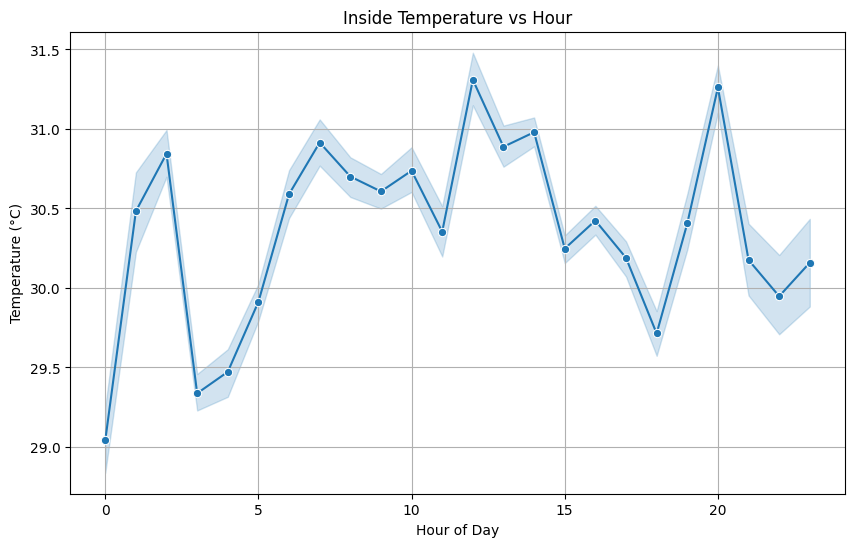

In [34]:
# Line plot of temperature by hour

plt.figure(figsize=(10, 6))
sns.lineplot(data=in_df, x='hour', y='temp', marker='o')
plt.title('Inside Temperature vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


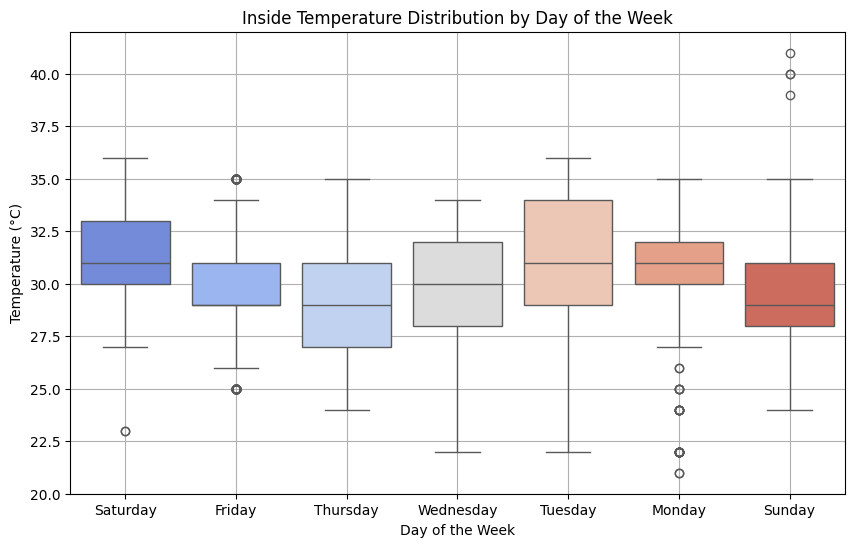

In [35]:
# Boxplot of temperature by day of the week

plt.figure(figsize=(10, 6))
sns.boxplot(data=in_df, x=in_df['datetime'].dt.day_name(), y='temp', palette='coolwarm')
plt.title('Inside Temperature Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

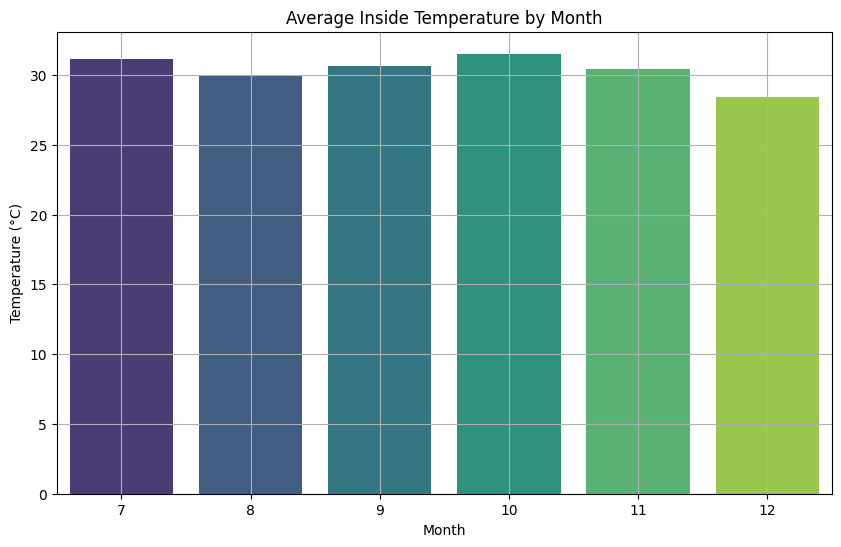

In [36]:
# Line plot of average temperature by month

monthly_avg_temp = in_df.groupby('month')['temp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_temp, x='month', y='temp', palette='viridis')
plt.title('Average Inside Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

**Data Visualization for Room outside temperature**

In [37]:
# Let's separate the data for Outside temperatures and drop the other columns from the dataset

out_df = df[df['out/in'] == 'Out']
out_df.drop(['out/in', 'season'], axis=1, inplace=True)

out_df

,temp,datetime,hour,dayOfWeek,month,Autumn,Monsoon,Winter
2,41,2018-12-08 09:29:00,9,5,12,0,0,1
3,41,2018-12-08 09:29:00,9,5,12,0,0,1
10,42,2018-12-08 09:25:00,9,5,12,0,0,1
11,42,2018-12-08 09:25:00,9,5,12,0,0,1
16,41,2018-12-08 09:21:00,9,5,12,0,0,1
...,...,...,...,...,...,...,...,...
97587,32,2018-07-28 07:07:00,7,5,7,0,1,0
97588,32,2018-07-28 07:07:00,7,5,7,0,1,0
97594,32,2018-07-28 07:07:00,7,5,7,0,1,0
97596,32,2018-07-28 07:07:00,7,5,7,0,1,0


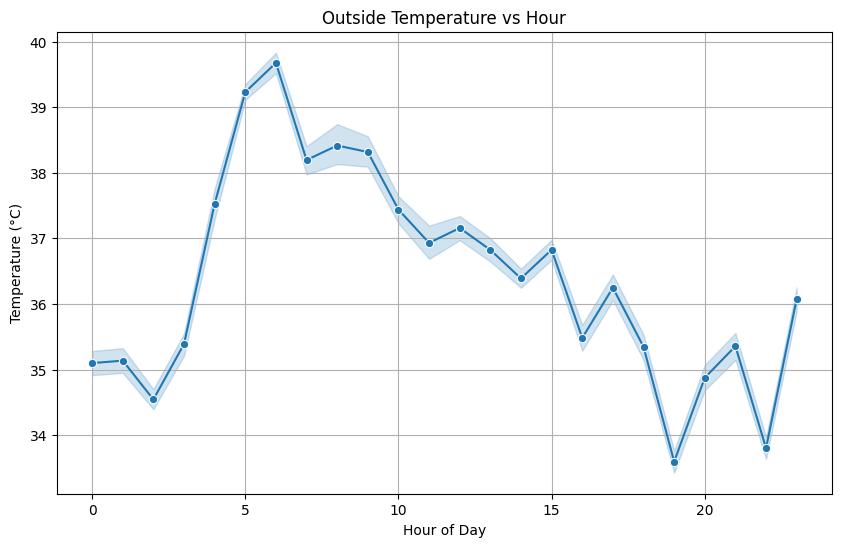

In [38]:
# Line plot of Outside temperature by hour

plt.figure(figsize=(10, 6))
sns.lineplot(data=out_df, x='hour', y='temp', marker='o')
plt.title('Outside Temperature vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


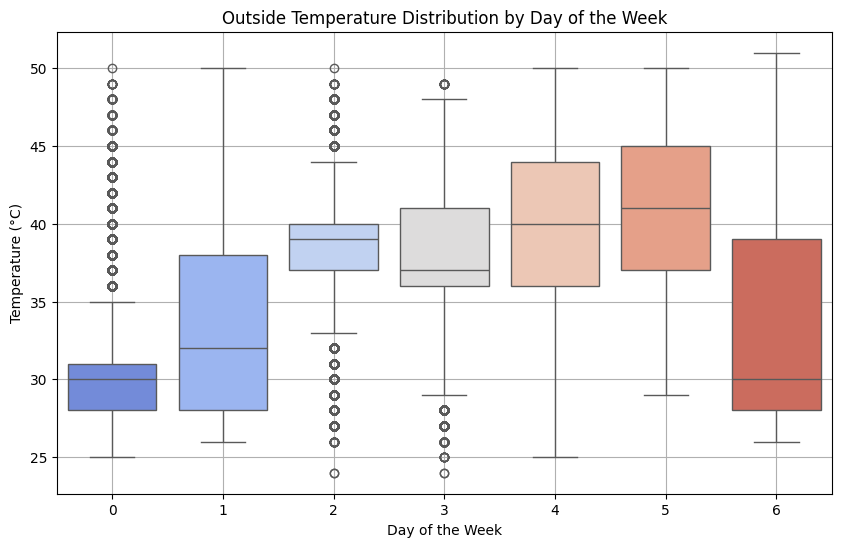

In [39]:
# Boxplot of Outside temperature by day of the week

plt.figure(figsize=(10, 6))
sns.boxplot(data=out_df, x='dayOfWeek', y='temp', palette='coolwarm')
plt.title('Outside Temperature Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


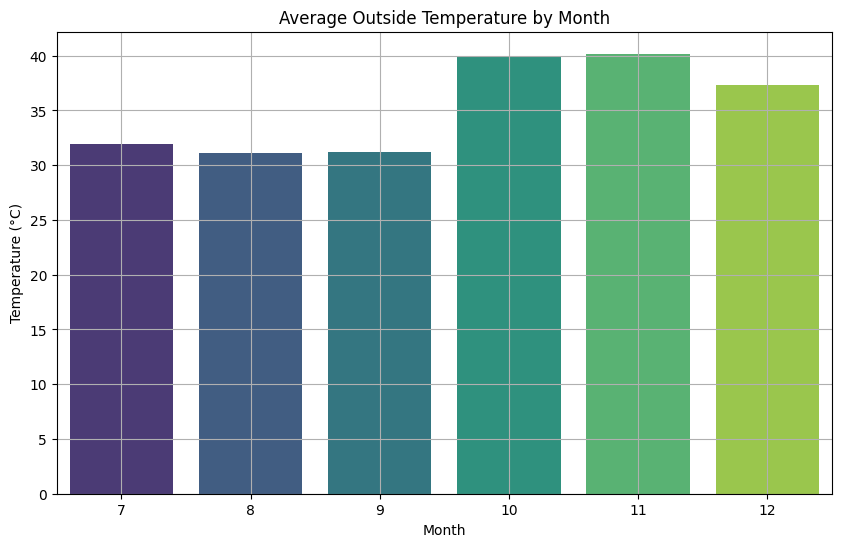

In [40]:
# Line plot of average Outside temperature by month

monthly_avg_temp = out_df.groupby('month')['temp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_temp, x='month', y='temp', palette='viridis')
plt.title('Average Outside Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


---

#### **ML Model (Prophet) - Training and Evaluation**

---

In [41]:
# !pip install prophet

In [42]:
from prophet import Prophet

##### **Model Training for Room Inside Temperature Data**

In [43]:
# Having a datetime format with minutes and seconds is not ideal for Prophet, as it's designed for daily or higher-level frequency data.
# Let's remove the seconds and minutes from the datetime column

in_df['datetime'] = in_df['datetime'].dt.floor('D')

In [44]:
# Let's move 'temp' column to the last position as it is the target variable
# Also, drop 'hour' column as it is not required for Prophet

temp_column = in_df.pop('temp')
in_df['temp'] = temp_column

in_df.drop(['hour'], axis=1, inplace=True)

in_df

,datetime,dayOfWeek,month,Autumn,Monsoon,Winter,temp
0,2018-12-08,5,12,0,0,1,29
1,2018-12-08,5,12,0,0,1,29
4,2018-12-08,5,12,0,0,1,31
5,2018-12-08,5,12,0,0,1,31
6,2018-12-08,5,12,0,0,1,29
...,...,...,...,...,...,...,...
97601,2018-07-28,5,7,0,1,0,31
97602,2018-07-28,5,7,0,1,0,31
97603,2018-07-28,5,7,0,1,0,31
97604,2018-07-28,5,7,0,1,0,31


In [45]:
# Let's create a new dataframe for Prophet model.

prophet_in_df = in_df

prophet_in_df

,datetime,dayOfWeek,month,Autumn,Monsoon,Winter,temp
0,2018-12-08,5,12,0,0,1,29
1,2018-12-08,5,12,0,0,1,29
4,2018-12-08,5,12,0,0,1,31
5,2018-12-08,5,12,0,0,1,31
6,2018-12-08,5,12,0,0,1,29
...,...,...,...,...,...,...,...
97601,2018-07-28,5,7,0,1,0,31
97602,2018-07-28,5,7,0,1,0,31
97603,2018-07-28,5,7,0,1,0,31
97604,2018-07-28,5,7,0,1,0,31


In [46]:
# Let's rename columns to 'ds' (datetime) and 'y' (temperature) as required by Prophet model

prophet_in_df.rename(columns={'datetime': 'ds', 'temp': 'y'}, inplace=True)
prophet_in_df['ds'] = pd.to_datetime(prophet_in_df['ds'])

prophet_in_df

,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y
0,2018-12-08,5,12,0,0,1,29
1,2018-12-08,5,12,0,0,1,29
4,2018-12-08,5,12,0,0,1,31
5,2018-12-08,5,12,0,0,1,31
6,2018-12-08,5,12,0,0,1,29
...,...,...,...,...,...,...,...
97601,2018-07-28,5,7,0,1,0,31
97602,2018-07-28,5,7,0,1,0,31
97603,2018-07-28,5,7,0,1,0,31
97604,2018-07-28,5,7,0,1,0,31


**Split the data into Train and Test**

In [47]:
# Split data into train and test

split_date = '2018-12-01'  # cutoff date

train_in_df = prophet_in_df[prophet_in_df['ds'] < split_date]
test_in_df = prophet_in_df[prophet_in_df['ds'] >= split_date]

test_in_df


,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y
0,2018-12-08,5,12,0,0,1,29
1,2018-12-08,5,12,0,0,1,29
4,2018-12-08,5,12,0,0,1,31
5,2018-12-08,5,12,0,0,1,31
6,2018-12-08,5,12,0,0,1,29
...,...,...,...,...,...,...,...
5859,2018-12-03,0,12,0,0,1,24
5860,2018-12-03,0,12,0,0,1,24
5861,2018-12-03,0,12,0,0,1,24
5864,2018-12-03,0,12,0,0,1,24


**Model Training**

In [48]:
# Let's train the model on the training data of inside temperature

model_in = Prophet()
model_in.fit(train_in_df)


22:18:52 - cmdstanpy - INFO - Chain [1] start processing
22:18:55 - cmdstanpy - INFO - Chain [1] done processing


**Model Prediction**

In [49]:
# Create a future DataFrame for predictions (e.g., next 30 days)

future_in = model_in.make_future_dataframe(periods=30)

# Predict future values

forecast_in = model_in.predict(future_in)


In [50]:
# Merging the forecasted data with the test data

test_merged_in_df = test_in_df.merge(forecast_in[['ds', 'yhat']], on='ds', how='left')

print(test_merged_in_df.isna().sum()) # checking for missing values


ds           0
dayOfWeek    0
month        0
Autumn       0
Monsoon      0
Winter       0
y            0
yhat         0
dtype: int64


In [51]:
# How the test data looks after merging?

test_merged_in_df

,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y,yhat
0,2018-12-08,5,12,0,0,1,29,29.107041
1,2018-12-08,5,12,0,0,1,29,29.107041
2,2018-12-08,5,12,0,0,1,31,29.107041
3,2018-12-08,5,12,0,0,1,31,29.107041
4,2018-12-08,5,12,0,0,1,29,29.107041
...,...,...,...,...,...,...,...,...
2463,2018-12-03,0,12,0,0,1,24,28.767343
2464,2018-12-03,0,12,0,0,1,24,28.767343
2465,2018-12-03,0,12,0,0,1,24,28.767343
2466,2018-12-03,0,12,0,0,1,24,28.767343


**Model Evaluation**

In [52]:
# Let's evaluate the model performance using MAE and MAPE

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_merged_in_df['y'], test_merged_in_df['yhat'])
mape = mean_absolute_percentage_error(test_merged_in_df['y'], test_merged_in_df['yhat'])

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")


Mean Absolute Error: 1.4025116265332125
Mean Absolute Percentage Error: 0.05029184153761727


In [53]:
# Let's understand the model attributes 

print(model_in.growth)  # growth model
print(model_in.interval_width)  # confidence interval width
print(model_in.yearly_seasonality)  # yearly seasonality
print(model_in.seasonality_mode)  # seasonality mode
print(model_in.seasonality_prior_scale)  # seasonality prior scale
print(model_in.changepoint_prior_scale)  # changepoint prior scale


linear
0.8
auto
additive
10.0
0.05


**Model Parameter Fine Tuning**

In [54]:
# Let's find the best parameters for the model by cross-validation

from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [5.0, 10.0, 20.0],
    'interval_width': [0.7, 0.8, 0.9]
}

best_params = None
best_score = float('inf')

for params in product(*param_grid.values()):

    param_dict = dict(zip(param_grid.keys(), params))

    model = Prophet(**param_dict)
    model.fit(train_in_df)    
    
    df_cv = cross_validation(model, initial='90 days', horizon='30 days')
    
    df_perf = performance_metrics(df_cv)    
    
    if df_perf['mape'].mean() < best_score:
        best_params = param_dict
        best_score = df_perf['mape'].mean()

print('Best parameters:', best_params)
print('Best score:', best_score)

22:18:56 - cmdstanpy - INFO - Chain [1] start processing
22:18:58 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]22:18:58 - cmdstanpy - INFO - Chain [1] start processing
22:19:00 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:02<00:00,  2.10s/it]
22:19:00 - cmdstanpy - INFO - Chain [1] start processing
22:19:02 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]22:19:03 - cmdstanpy - INFO - Chain [1] start processing
22:19:04 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:02<00:00,  2.18s/it]
22:19:05 - cmdstanpy - INFO - Chain [1] start processing
22:19:07 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]22:19:07 - cmdstanpy - INFO - Chain [1] start processing
22:19:09 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:02<00:00,  2.13s/it]
22:19:09 - cmdstanpy - INFO - Chain [1] start processing
22:19:11 - cmdst

Best parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5.0, 'interval_width': 0.7}
Best score: 0.037397625008796204


22:29:07 - cmdstanpy - INFO - Chain [1] start processing
22:29:14 - cmdstanpy - INFO - Chain [1] done processing


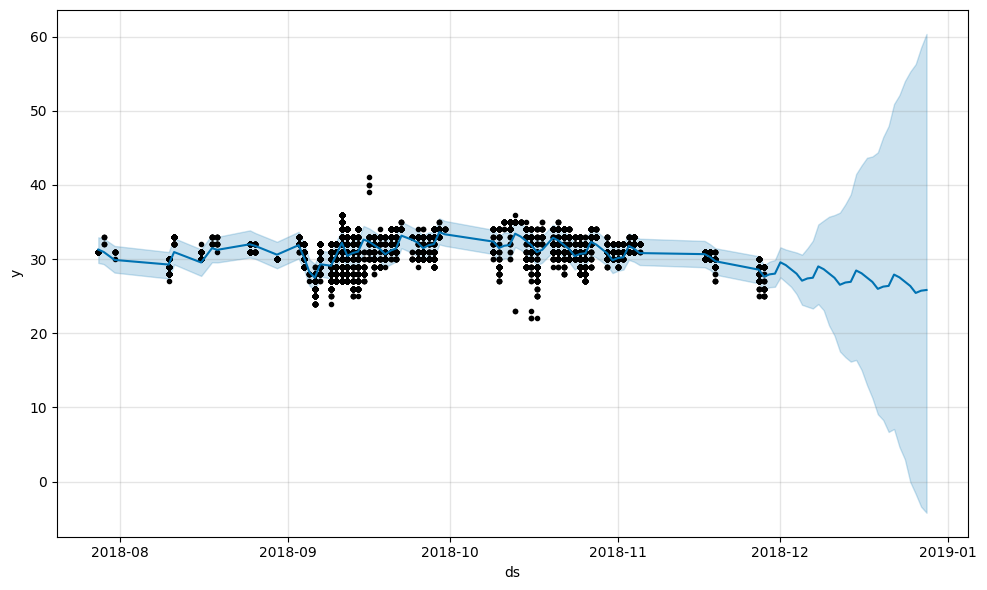

In [55]:
# Create a new Prophet model with the best parameters

best_model = Prophet(**best_params)
best_model.fit(train_in_df)

future = best_model.make_future_dataframe(periods=30)
forecast = best_model.predict(future)

fig = best_model.plot(forecast)

In [56]:
# How is the test data looks like before merging with the forecasted data?

test_in_df

,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y
0,2018-12-08,5,12,0,0,1,29
1,2018-12-08,5,12,0,0,1,29
4,2018-12-08,5,12,0,0,1,31
5,2018-12-08,5,12,0,0,1,31
6,2018-12-08,5,12,0,0,1,29
...,...,...,...,...,...,...,...
5859,2018-12-03,0,12,0,0,1,24
5860,2018-12-03,0,12,0,0,1,24
5861,2018-12-03,0,12,0,0,1,24
5864,2018-12-03,0,12,0,0,1,24


In [57]:
# Merging the forecasted data with the test data

test_merged_in_df1 = test_in_df.merge(forecast[['ds', 'yhat']], on='ds', how='left')

test_merged_in_df1


,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y,yhat
0,2018-12-08,5,12,0,0,1,29,29.013263
1,2018-12-08,5,12,0,0,1,29,29.013263
2,2018-12-08,5,12,0,0,1,31,29.013263
3,2018-12-08,5,12,0,0,1,31,29.013263
4,2018-12-08,5,12,0,0,1,29,29.013263
...,...,...,...,...,...,...,...,...
2463,2018-12-03,0,12,0,0,1,24,28.606362
2464,2018-12-03,0,12,0,0,1,24,28.606362
2465,2018-12-03,0,12,0,0,1,24,28.606362
2466,2018-12-03,0,12,0,0,1,24,28.606362


In [58]:
# Let's evaluate the model performance using MAE and MAPE

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_merged_in_df1['y'], test_merged_in_df1['yhat'])
mape = mean_absolute_percentage_error(test_merged_in_df1['y'], test_merged_in_df1['yhat'])

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")


Mean Absolute Error: 1.4843747255488962
Mean Absolute Percentage Error: 0.05293684700476381


**Observation:**

Upon comparing the results before and after parameter fine-tuning, a notable observation is that the initial model outperforms the fine-tuned model. This suggests that the default parameters may have been sufficiently optimal for this specific dataset. Therefore, based on these findings, we recommend using the initial model for future forecasting purposes.

**Final Model Selection**

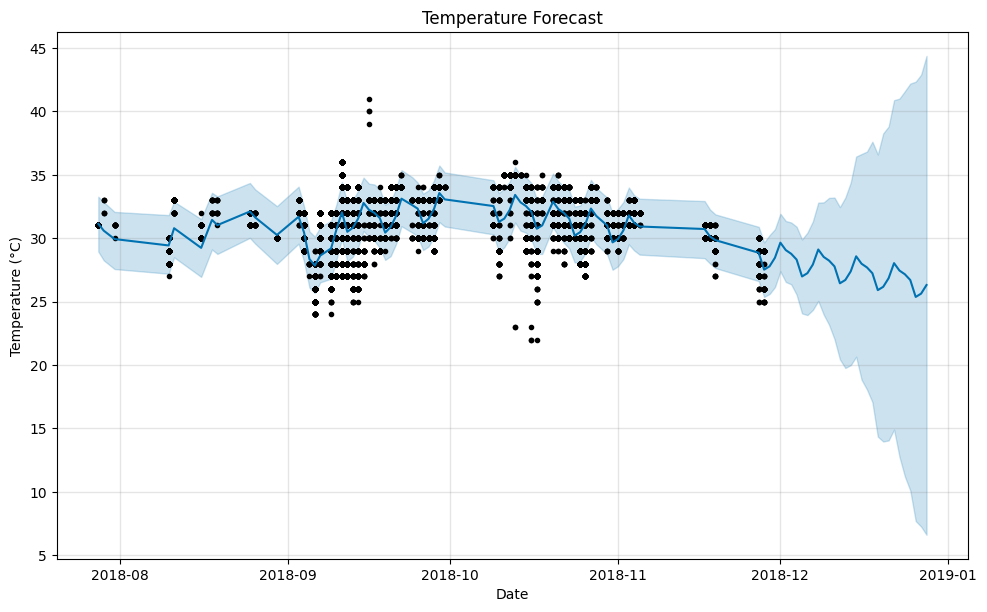

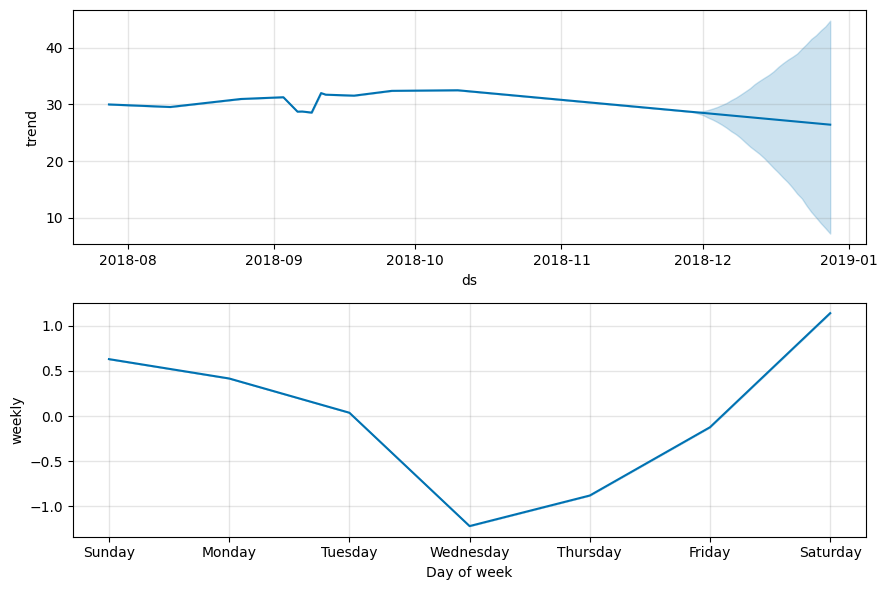

In [59]:
# Plot the forecast

model_in.plot(forecast_in)

plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

model_in.plot_components(forecast_in)
plt.show()


---

##### **Model Training for Room Outside Temperature Data**

In [60]:
# Having a datetime format with minutes and seconds is not ideal for Prophet, as it's designed for daily or higher-level frequency data.
# Let's remove the seconds and minutes from the datetime column

out_df['datetime'] = out_df['datetime'].dt.floor('D')

In [61]:
# Let's move 'temp' column to the last position as it is the target variable
# Also, drop 'hour' column as it is not required for Prophet

temp_column = out_df.pop('temp')
out_df['temp'] = temp_column

out_df.drop(['hour'], axis=1, inplace=True)

out_df

,datetime,dayOfWeek,month,Autumn,Monsoon,Winter,temp
2,2018-12-08,5,12,0,0,1,41
3,2018-12-08,5,12,0,0,1,41
10,2018-12-08,5,12,0,0,1,42
11,2018-12-08,5,12,0,0,1,42
16,2018-12-08,5,12,0,0,1,41
...,...,...,...,...,...,...,...
97587,2018-07-28,5,7,0,1,0,32
97588,2018-07-28,5,7,0,1,0,32
97594,2018-07-28,5,7,0,1,0,32
97596,2018-07-28,5,7,0,1,0,32


In [62]:
# Let's create a new dataframe for Prophet model.

prophet_out_df = out_df

prophet_out_df

,datetime,dayOfWeek,month,Autumn,Monsoon,Winter,temp
2,2018-12-08,5,12,0,0,1,41
3,2018-12-08,5,12,0,0,1,41
10,2018-12-08,5,12,0,0,1,42
11,2018-12-08,5,12,0,0,1,42
16,2018-12-08,5,12,0,0,1,41
...,...,...,...,...,...,...,...
97587,2018-07-28,5,7,0,1,0,32
97588,2018-07-28,5,7,0,1,0,32
97594,2018-07-28,5,7,0,1,0,32
97596,2018-07-28,5,7,0,1,0,32


In [63]:
# Let's rename columns to 'ds' (datetime) and 'y' (temperature) as required by Prophet model

prophet_out_df.rename(columns={'datetime': 'ds', 'temp': 'y'}, inplace=True)
prophet_out_df['ds'] = pd.to_datetime(prophet_out_df['ds'])

prophet_out_df

,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y
2,2018-12-08,5,12,0,0,1,41
3,2018-12-08,5,12,0,0,1,41
10,2018-12-08,5,12,0,0,1,42
11,2018-12-08,5,12,0,0,1,42
16,2018-12-08,5,12,0,0,1,41
...,...,...,...,...,...,...,...
97587,2018-07-28,5,7,0,1,0,32
97588,2018-07-28,5,7,0,1,0,32
97594,2018-07-28,5,7,0,1,0,32
97596,2018-07-28,5,7,0,1,0,32


**Split the data into Train and Test**

In [64]:
# Split data into train and test

split_date = '2018-12-01'  # cutoff date

train_out_df = prophet_out_df[prophet_out_df['ds'] < split_date]
test_out_df = prophet_out_df[prophet_out_df['ds'] >= split_date]

test_out_df


,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y
2,2018-12-08,5,12,0,0,1,41
3,2018-12-08,5,12,0,0,1,41
10,2018-12-08,5,12,0,0,1,42
11,2018-12-08,5,12,0,0,1,42
16,2018-12-08,5,12,0,0,1,41
...,...,...,...,...,...,...,...
7607,2018-12-01,5,12,0,0,1,36
7608,2018-12-01,5,12,0,0,1,37
7609,2018-12-01,5,12,0,0,1,37
7610,2018-12-01,5,12,0,0,1,37


**Model Training**

In [65]:
# Let's train the model on the training data of inside temperature

model_out = Prophet()
model_out.fit(train_out_df)


22:29:16 - cmdstanpy - INFO - Chain [1] start processing
22:29:38 - cmdstanpy - INFO - Chain [1] done processing


**Model Prediction**

In [66]:
# Create a future DataFrame for predictions (e.g., next 30 days)

future_out = model_out.make_future_dataframe(periods=30)

# Predict future values

forecast_out = model_out.predict(future_out)


In [67]:
# Merging the forecasted data with the test data

test_merged_out_df = test_out_df.merge(forecast_out[['ds', 'yhat']], on='ds', how='left')

print(test_merged_out_df.isna().sum()) # checking for missing values


ds           0
dayOfWeek    0
month        0
Autumn       0
Monsoon      0
Winter       0
y            0
yhat         0
dtype: int64


In [68]:
# How the test data looks after merging?

test_merged_out_df

,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y,yhat
0,2018-12-08,5,12,0,0,1,41,40.920243
1,2018-12-08,5,12,0,0,1,41,40.920243
2,2018-12-08,5,12,0,0,1,42,40.920243
3,2018-12-08,5,12,0,0,1,42,40.920243
4,2018-12-08,5,12,0,0,1,41,40.920243
...,...,...,...,...,...,...,...,...
5139,2018-12-01,5,12,0,0,1,36,41.098873
5140,2018-12-01,5,12,0,0,1,37,41.098873
5141,2018-12-01,5,12,0,0,1,37,41.098873
5142,2018-12-01,5,12,0,0,1,37,41.098873


**Model Evaluation**

In [69]:
# Let's evaluate the model performance using MAE and MAPE

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_merged_out_df['y'], test_merged_out_df['yhat'])
mape = mean_absolute_percentage_error(test_merged_out_df['y'], test_merged_out_df['yhat'])

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")


Mean Absolute Error: 3.0890639124971773
Mean Absolute Percentage Error: 0.08622721551572739


In [70]:
# Let's understand the model attributes 

print(model_out.growth)  # growth model
print(model_out.interval_width)  # confidence interval width
print(model_out.yearly_seasonality)  # yearly seasonality
print(model_out.seasonality_mode)  # seasonality mode
print(model_out.seasonality_prior_scale)  # seasonality prior scale
print(model_out.changepoint_prior_scale)  # changepoint prior scale


linear
0.8
auto
additive
10.0
0.05


**Model Parameter Fine Tuning**

In [71]:
# Let's find the best parameters for the model by cross-validation

from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [5.0, 10.0, 20.0],
    'interval_width': [0.7, 0.8, 0.9]
}

best_params = None
best_score = float('inf')

for params in product(*param_grid.values()):

    param_dict = dict(zip(param_grid.keys(), params))

    model = Prophet(**param_dict)
    model.fit(train_out_df)    
    
    df_cv = cross_validation(model, initial='90 days', horizon='30 days')
    
    df_perf = performance_metrics(df_cv)    
    
    if df_perf['mape'].mean() < best_score:
        best_params = param_dict
        best_score = df_perf['mape'].mean()

print('Best parameters:', best_params)
print('Best score:', best_score)

22:29:40 - cmdstanpy - INFO - Chain [1] start processing
22:29:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]22:29:58 - cmdstanpy - INFO - Chain [1] start processing
22:30:19 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:23<00:00, 23.95s/it]
22:30:22 - cmdstanpy - INFO - Chain [1] start processing
22:30:38 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]22:30:40 - cmdstanpy - INFO - Chain [1] start processing
22:30:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:20<00:00, 20.79s/it]
22:31:01 - cmdstanpy - INFO - Chain [1] start processing
22:31:16 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]22:31:17 - cmdstanpy - INFO - Chain [1] start processing
22:31:34 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:19<00:00, 19.80s/it]
22:31:37 - cmdstanpy - INFO - Chain [1] start processing
22:31:52 - cmdst

Best parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'interval_width': 0.7}
Best score: 0.18008887931253134


22:52:01 - cmdstanpy - INFO - Chain [1] start processing
22:52:15 - cmdstanpy - INFO - Chain [1] done processing


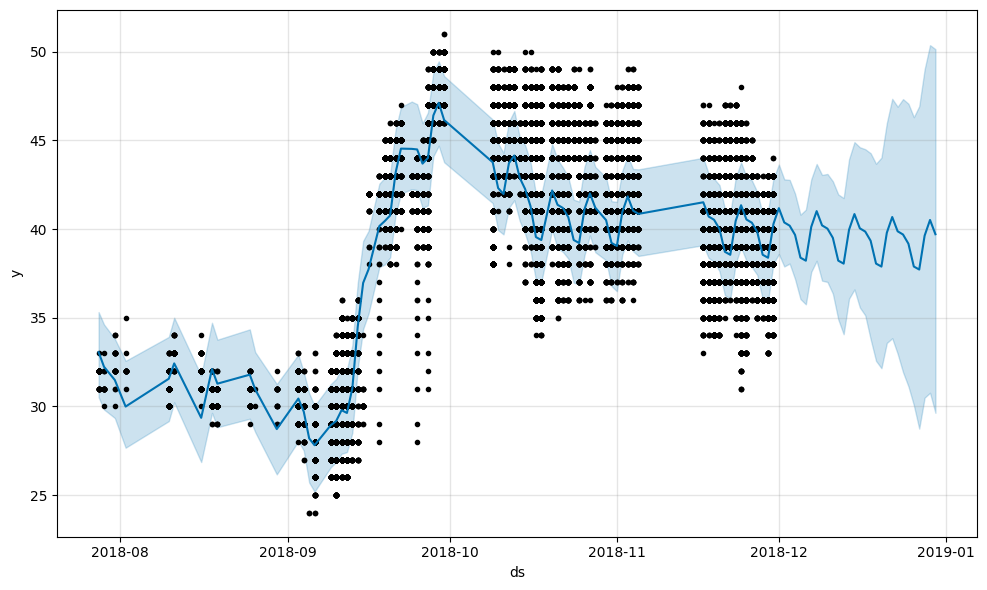

In [72]:
# Create a new Prophet model with the best parameters

best_model = Prophet(**best_params)
best_model.fit(train_out_df)

future = best_model.make_future_dataframe(periods=30)
forecast = best_model.predict(future)

fig = best_model.plot(forecast)

In [73]:
# How is the test data looks like before merging with the forecasted data?

test_out_df

,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y
2,2018-12-08,5,12,0,0,1,41
3,2018-12-08,5,12,0,0,1,41
10,2018-12-08,5,12,0,0,1,42
11,2018-12-08,5,12,0,0,1,42
16,2018-12-08,5,12,0,0,1,41
...,...,...,...,...,...,...,...
7607,2018-12-01,5,12,0,0,1,36
7608,2018-12-01,5,12,0,0,1,37
7609,2018-12-01,5,12,0,0,1,37
7610,2018-12-01,5,12,0,0,1,37


In [74]:
# Merging the forecasted data with the test data

test_merged_out_df1 = test_out_df.merge(forecast[['ds', 'yhat']], on='ds', how='left')

test_merged_out_df1


,ds,dayOfWeek,month,Autumn,Monsoon,Winter,y,yhat
0,2018-12-08,5,12,0,0,1,41,41.009522
1,2018-12-08,5,12,0,0,1,41,41.009522
2,2018-12-08,5,12,0,0,1,42,41.009522
3,2018-12-08,5,12,0,0,1,42,41.009522
4,2018-12-08,5,12,0,0,1,41,41.009522
...,...,...,...,...,...,...,...,...
5139,2018-12-01,5,12,0,0,1,36,41.175735
5140,2018-12-01,5,12,0,0,1,37,41.175735
5141,2018-12-01,5,12,0,0,1,37,41.175735
5142,2018-12-01,5,12,0,0,1,37,41.175735


In [75]:
# Let's evaluate the model performance using MAE and MAPE

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_merged_out_df1['y'], test_merged_out_df1['yhat'])
mape = mean_absolute_percentage_error(test_merged_out_df1['y'], test_merged_out_df1['yhat'])

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")


Mean Absolute Error: 3.122265575013151
Mean Absolute Percentage Error: 0.08714666121936869


**Observation:**

Just like Inside Temperature model, upon comparing the results before and after parameter fine-tuning, a notable observation is that the initial model outperforms the fine-tuned model. 

This suggests that the default parameters may have been sufficiently optimal for this specific dataset. Therefore, based on these findings, we recommend using the initial model for future forecasting purposes.

**Final Model Selection**

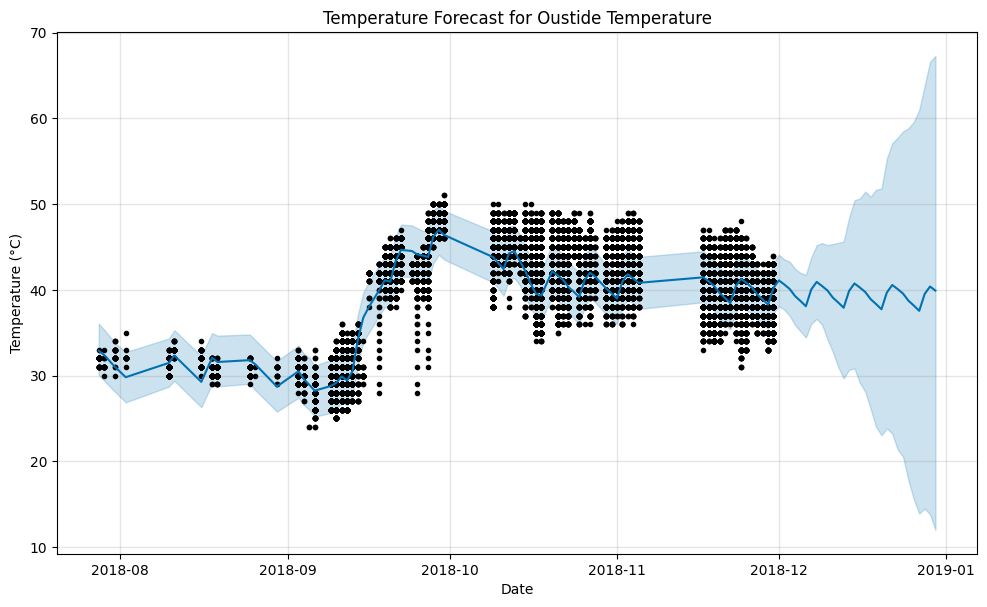

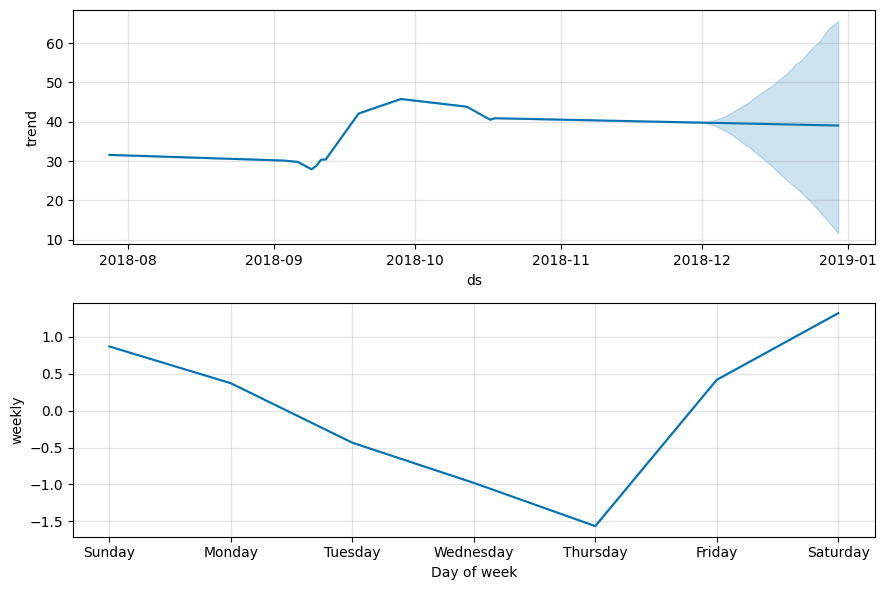

In [76]:
# Plot the forecast

model_out.plot(forecast_out)

plt.title('Temperature Forecast for Oustide Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

model_out.plot_components(forecast_out)
plt.show()


---

#### **Conclusion**

---

The Prophet model demonstrates exceptional performance, yielding impressive results on both inside and outside temperature datasets. Its evaluation metrics result makes it a strong candidate for forecasting temperature fluctuations.

However, to further optimize results, it's essential to explore alternative models, such as SARIMAX or LSTM. These models may offer even better performance, especially when accounting for additional variables or complex seasonal patterns.

This analysis provides valuable insights based on the current dataset. Nevertheless, expanding the dataset to include multiple years and seasons could significantly enhance the model's predictive power. A more extensive dataset would enable the exploration of deeper patterns, trends, and correlations, ultimately leading to more robust and accurate forecasts.

---